In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df = df.drop('Id', axis=1)

df = df.drop_duplicates()

print(f"Linhas restantes após remover duplicatas: {len(df)}")
df.head()

Linhas restantes após remover duplicatas: 778


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 2336
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.8 KB


In [35]:
df_clean = df.copy()

# Colunas onde zero significa dado ausente
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Substituir zeros por NaN
df_clean[cols_with_missing] = df[cols_with_missing].replace(0, pd.NA)

# Converter explicitamente para float
df_clean[cols_with_missing] = df_clean[cols_with_missing].apply(pd.to_numeric, errors='coerce')

In [36]:
df_clean.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                36
SkinThickness               229
Insulin                     377
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [37]:
# Substituir NaN pela média da coluna
for col in cols_with_missing:
    df_clean[col] = df_clean[col].fillna(df[col].median())

df_clean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Valores como 0 em "Glicose" ou "IMC" são biologicamente impossíveis, ou seja, são dados faltantes (erros). Substituímos pela mediana (e não pela média) porque a mediana é menos afetada por outliers (valores extremos), mantendo a integridade dos dados médicos.

In [38]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,778.0,3.821337,3.360794,0.000,1.000,3.0000,6.00000,17.00
Glucose,778.0,121.951157,30.470235,44.000,100.000,117.0000,141.00000,199.00
BloodPressure,778.0,72.307198,12.166561,24.000,64.000,72.0000,80.00000,122.00
SkinThickness,778.0,27.533419,9.756075,7.000,23.000,23.0000,32.00000,110.00
Insulin,778.0,97.832905,103.763754,14.000,36.000,36.0000,130.00000,846.00
BMI,778.0,32.641452,7.254245,18.200,27.600,32.2750,36.77500,80.60
DiabetesPedigreeFunction,778.0,0.471861,0.330180,0.078,0.244,0.3745,0.62675,2.42
Age,778.0,33.347044,11.789024,21.000,24.000,29.0000,41.00000,81.00
Outcome,778.0,0.349614,0.477155,0.000,0.000,0.0000,1.00000,1.00


In [39]:
sns.set_theme(style="whitegrid", palette="muted")

df_clean_analysis = df_clean.drop(columns='Outcome')

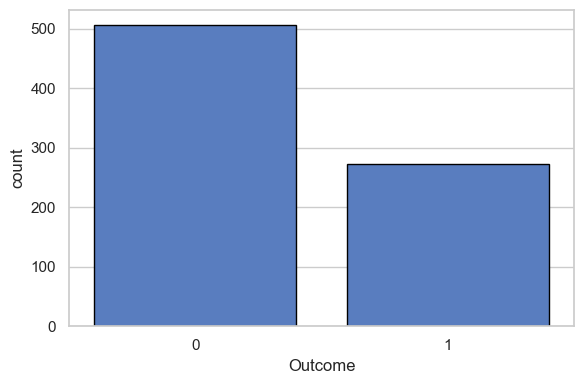

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Outcome', edgecolor='black')

plt.tight_layout()
plt.show()

In [41]:
df_clean.to_csv('diabetes_final.csv', index=False)